In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt 

#Creando modelo


In [4]:
data_path = './/data//'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                                                    ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                                                   ]))

Files already downloaded and verified
Files already downloaded and verified


In [5]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
frog
ship
deer
frog


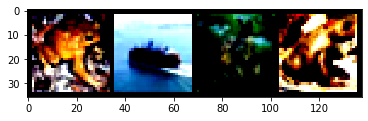

In [6]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [7]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [9]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(512, 2)) #Salida

In [10]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [11]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [12]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [13]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [14]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(512, 2),
            nn.Softmax(dim=1)) #Salida

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

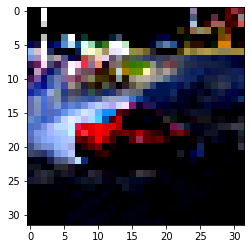

In [15]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))

class_names[label]

In [16]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5820, 0.4180]], grad_fn=<SoftmaxBackward>)

In [17]:
_, index = torch.max(out, dim = 1)

print('->',class_names[label],' model:',class_names[index])

->car model:car


In [18]:
#Se le cambia la funcion a una logaritmica
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(512, 2), 
            nn.LogSoftmax(dim=1)) #Salida

loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

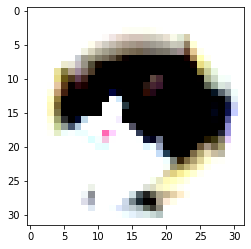

In [19]:
img, label = data_set[50]
plt.imshow(img.permute(1,2,0))

class_names[label]

In [20]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->',class_names[label],' model:',class_names[index])

tensor([[-0.6333, -0.7569]], grad_fn=<LogSoftmaxBackward>)
->cat model:car


In [3]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(512, 2), 
            nn.LogSoftmax(dim=1)) #Salida

loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_function(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

NameError: name 'data_set' is not defined

In [30]:

train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(512, 2), 
            nn.LogSoftmax(dim=1)) #Salida

loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.442351
Epoch: 1, Loss: 0.282523
Epoch: 2, Loss: 0.492799
Epoch: 3, Loss: 0.216868
Epoch: 4, Loss: 0.153769
Epoch: 5, Loss: 0.356302
Epoch: 6, Loss: 0.507051
Epoch: 7, Loss: 0.707978
Epoch: 8, Loss: 0.470123
Epoch: 9, Loss: 0.248578
Epoch: 10, Loss: 0.230407
Epoch: 11, Loss: 0.224677
Epoch: 12, Loss: 0.122586
Epoch: 13, Loss: 0.074876
Epoch: 14, Loss: 0.243640
Epoch: 15, Loss: 0.117374
Epoch: 16, Loss: 0.221029
Epoch: 17, Loss: 0.211517
Epoch: 18, Loss: 0.320784
Epoch: 19, Loss: 0.163304
Epoch: 20, Loss: 0.099423
Epoch: 21, Loss: 0.080418
Epoch: 22, Loss: 0.092337
Epoch: 23, Loss: 0.236122
Epoch: 24, Loss: 0.043331
Epoch: 25, Loss: 0.093276
Epoch: 26, Loss: 0.173025
Epoch: 27, Loss: 0.081044
Epoch: 28, Loss: 0.111778
Epoch: 29, Loss: 0.247456
Epoch: 30, Loss: 0.072823
Epoch: 31, Loss: 0.048939
Epoch: 32, Loss: 0.084388
Epoch: 33, Loss: 0.078874
Epoch: 34, Loss: 0.091310
Epoch: 35, Loss: 0.079988
Epoch: 36, Loss: 0.054604
Epoch: 37, Loss: 0.057449
Epoch: 38, Loss: 0.038

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

In [ ]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
#Mejoras, agrego funciones para mejorar, y acercarme las probabilidades a 1 o 0



train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),  #Entrada
            nn.Tanh(),    #Aplico la tangente hiperbolica
            nn.Linear(1024,512),
            nn.Tanh(),
            nn.Linear(512,128),
            nn.Tanh(),
            nn.Linear(128, 2)) #Salida

loss_function = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0 
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

In [ ]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
class_names = ['car', 'cat']
img, label = dataset[50]
out = model(img.view(-1).unsqueeze(0))
print(class_names[label])print(out)#output
cat
tensor([[0.4957, 0.5043]], grad_fn=<SoftmaxBackward>)

In [29]:
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))

tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1],
        [2],
        [3],
        [4]])
